In [ ]:
import pandas as pd
import numpy as np
from __future__ import print_function
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
!pip install openpyxl
print("Installed")

Installed


In [3]:
df = pd.read_excel("/Users/mortezaabyadeh/Desktop/Canada.xlsx", sheet_name = "Canada by Citizenship", skiprows = range(20), skipfooter = 2)

In [4]:
df.head()
df.set_index('OdName', inplace=True)

In [5]:
df.columns

Index([    'Type', 'Coverage',     'AREA', 'AreaName',      'REG',  'RegName',
            'DEV',  'DevName',       1980,       1981,       1982,       1983,
             1984,       1985,       1986,       1987,       1988,       1989,
             1990,       1991,       1992,       1993,       1994,       1995,
             1996,       1997,       1998,       1999,       2000,       2001,
             2002,       2003,       2004,       2005,       2006,       2007,
             2008,       2009,       2010,       2011,       2012,       2013],
      dtype='object')

In [ ]:
df['Total'] = df.loc[:, 1980:2013].sum(axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, Afghanistan to Zimbabwe
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   AREA      195 non-null    int64 
 3   AreaName  195 non-null    object
 4   REG       195 non-null    int64 
 5   RegName   195 non-null    object
 6   DEV       195 non-null    int64 
 7   DevName   195 non-null    object
 8   1980      195 non-null    int64 
 9   1981      195 non-null    int64 
 10  1982      195 non-null    int64 
 11  1983      195 non-null    int64 
 12  1984      195 non-null    int64 
 13  1985      195 non-null    int64 
 14  1986      195 non-null    int64 
 15  1987      195 non-null    int64 
 16  1988      195 non-null    int64 
 17  1989      195 non-null    int64 
 18  1990      195 non-null    int64 
 19  1991      195 non-null    int64 
 20  1992      195 non-null    int64 
 21  1993  

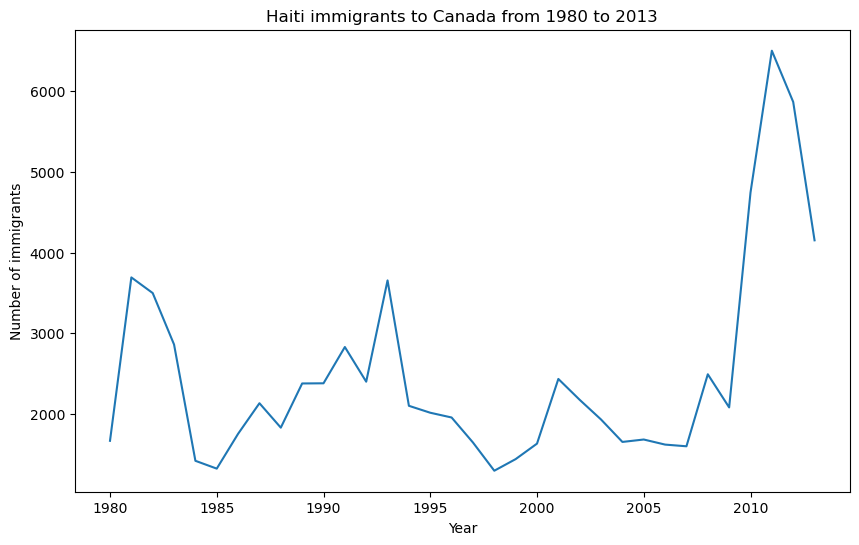

In [8]:
df2 = df.copy()

#df2.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage', 'RegName', 'DevName', 'AreaName'], axis=1, inplace=True)
df2.head()

all(isinstance(column, str) for column in df2.columns)
df2.columns = list(map(str, df2.columns))


years = list(map(str, range(1980, 2014)))

df2_Haiti = df2.loc['Haiti', years]
df2_Haiti.plot(kind='line', figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Haiti immigrants to Canada from 1980 to 2013') # add title to the plot
plt.show()
#plt.savefig("/Users/mortezaabyadeh/Desktop/Immigrants_BarChart.png")

In [ ]:
df2.head()

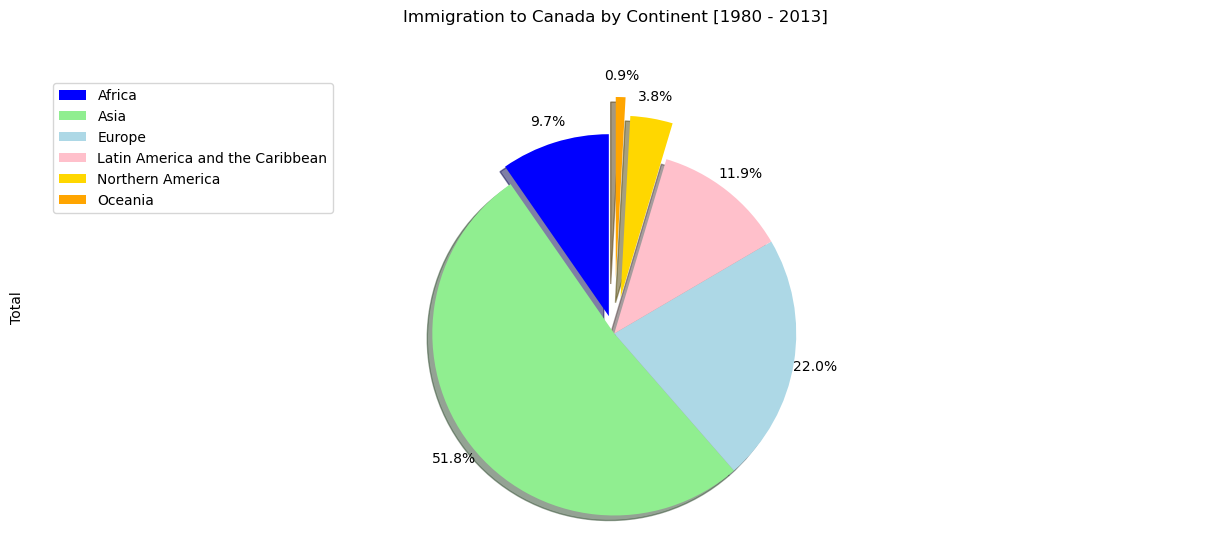

In [10]:
df_AreaName = df2.groupby('AreaName', axis=0).sum()

colors_list = ['blue', 'lightgreen', 'lightblue', 'pink', 'gold', 'orange']
explode_list = [0.1, 0, 0, 0, 0.2, 0.3] # ratio for each continent with which to offset each wedge.

# autopct create %, start angle represent starting point
df_AreaName['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.1) 

plt.axis('equal') 

plt.legend(labels=df_AreaName.index, loc='upper left', bbox_to_anchor=(0.01, 1)) 

plt.show()

In [11]:
df2.sort_values(["Total"], ascending=False, axis=0, inplace=True)

In [ ]:
df2.head()

In [ ]:
df3 =df2.copy()
df3 = df3.rename_axis('Country')
df3.head()

In [ ]:
df3_top5 = df3.head()
df3_top5.head()
df3_top5 = df3_top5[years].transpose()
df3_top5.head()
df3_top5.rename(columns={'United Kingdom of Great Britain and Northern Ireland': 'UK'}, inplace=True)
df3_top5.head()

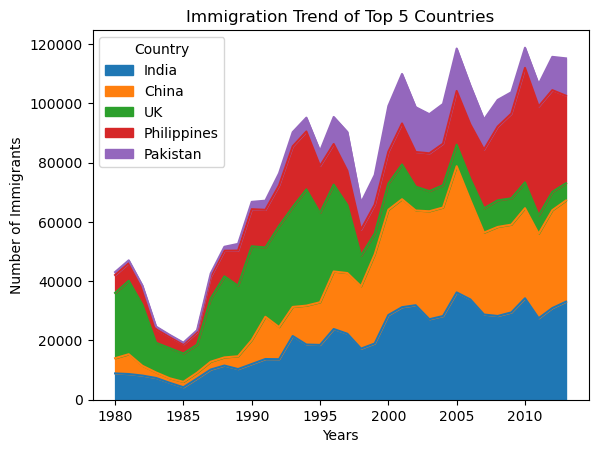

In [15]:
df3_top5.plot(kind="area")
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

In [ ]:
df3['2013'].plot(kind="hist")
plt.title('Histogram of Immigration form 195 Countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')
plt.show()

In [ ]:
count, bin_edges = np.histogram(df3['2013'])
df3['2013'].plot(kind="hist", xticks = bin_edges)
plt.title('Histogram of Immigration form 195 Countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')
plt.show()

In [ ]:
count, bin_edges = np.histogram(df3['2013'], bins=5)  # Change the number of bins to 5
df3['2013'].plot(kind="hist", xticks = bin_edges)
plt.title('Histogram of Immigration form 195 Countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')
plt.show()

In [19]:
Years = list(map(str, range(1980, 2014)))
df_iceland = df3.loc["Iceland", Years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

In [ ]:
df_iceland.plot(kind="bar")
plt.title("Icelandic immigrants to Canada between 1980 to 2013")
plt.ylabel('Number of Immigrants')
plt.xlabel('Year')
plt.show()

In [ ]:
df_iceland.plot(kind="barh", color='red')
plt.title("Icelandic immigrants to Canada between 1980 to 2013")
plt.ylabel('Number of Immigrants')
plt.xlabel('Year')
plt.show()

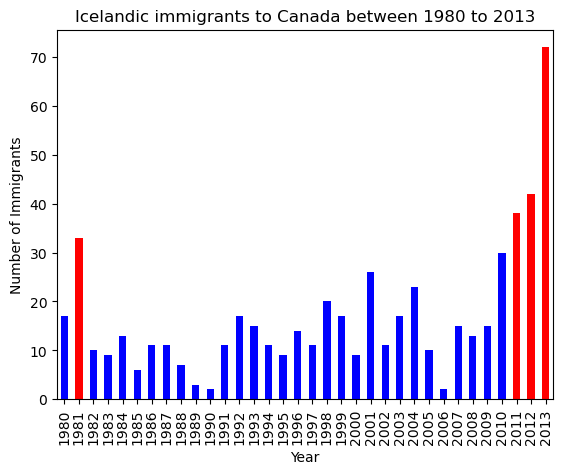

In [22]:
threshold = 30

ax = df_iceland.plot(kind="bar", color=df_iceland.apply(lambda x: 'red' if x > threshold else 'blue'))

plt.title("Icelandic immigrants to Canada between 1980 to 2013")
plt.ylabel('Number of Immigrants')
plt.xlabel('Year')

plt.show()

In [ ]:
df3.head()

In [24]:
df3.rename(columns={'AreaName': 'Continents'}, inplace=True)

In [ ]:
df3.head()

In [26]:
df_continents = df3.groupby("Continents", axis=0).sum()

In [ ]:
df_continents.head()

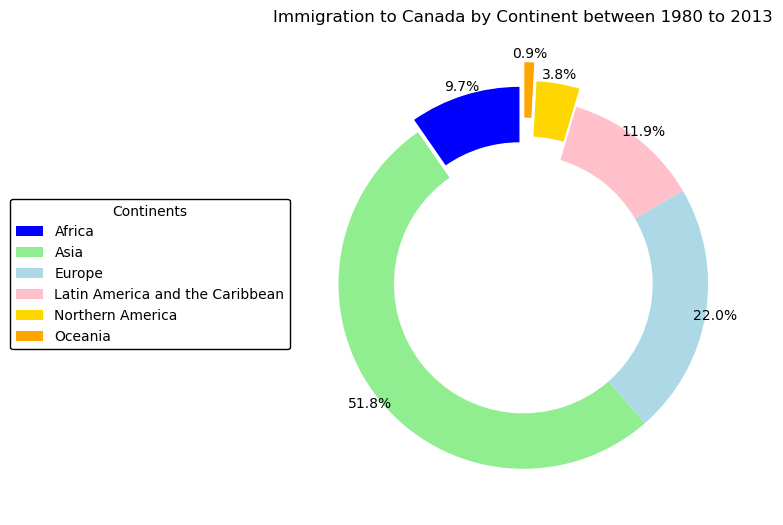

In [28]:
explode_list = [0.07, 0, 0, 0, 0.1, 0.2]
colors_list = ['blue', 'lightgreen', 'lightblue', 'pink', 'gold', 'orange']

df_continents['Total'].plot(kind="pie",
                            figsize=(20, 6), 
                            startangle=90,    
                            explode=explode_list ,
                            colors = colors_list,
                            labels=None,
                            autopct='%1.1f%%',
                            pctdistance=1.05,
                            wedgeprops=dict(width=0.3))
plt.title('Immigration to Canada by Continent between 1980 to 2013', y = 1.05)
legend = plt.legend(labels=df_continents.index, title="Continents", loc='upper right', bbox_to_anchor=(0.01, 0.7))
legend.get_frame().set_facecolor('white')
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_alpha(1)

plt.show()

In [ ]:
df_japan = df3.loc[["Japan"], years].transpose()
df_japan.head()

In [ ]:
df_japan.plot(kind="box")
plt.title('Box Plot of Japanese Immigrants from 1980 to 2013')
plt.ylabel('Number of Immigrants')
ax.yaxis.grid(True, linestyle='--', linewidth=0.7)
ax.xaxis.grid(True, linestyle='--', linewidth=0.7, which='minor')


plt.show()

In [ ]:
df_europe = df3[df3['Continents'] == 'Europe']
df_europe.head()

In [32]:
df_europe_years = df_europe[years].transpose()

In [ ]:
plt.figure(figsize=(50, 6))
df_europe[years].plot(kind="box", whis=1)
plt.title('Box Plot of Immigration to European Countries from 1980 to 2013', fontsize=15)
plt.xlabel('Countries')
plt.ylabel('Number of Immigrants')
plt.tight_layout()
plt.savefig('/Users/mortezaabyadeh/Desktop/boxplot_immigration_europe.pdf')


In [ ]:
df_europe = df_europe.head()
df_europe

<Figure size 10000x600 with 0 Axes>

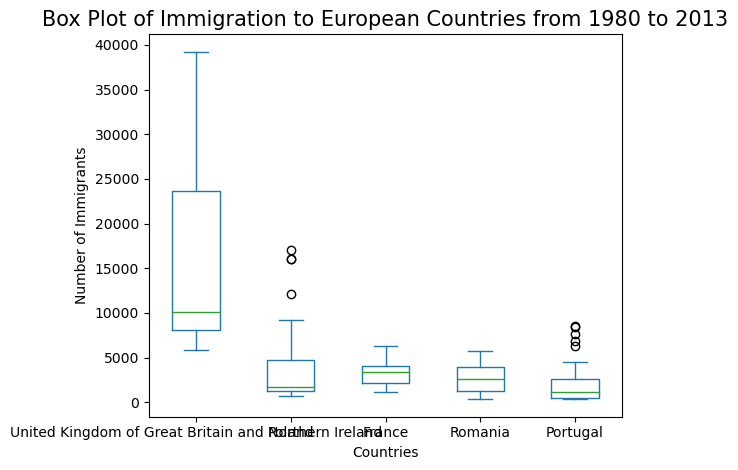

In [35]:
df_europe_years = df_europe[years].transpose()
plt.figure(figsize=(100, 6))
df_europe_years.plot(kind="box")
plt.title('Box Plot of Immigration to European Countries from 1980 to 2013', fontsize=15)
plt.xlabel('Countries')
plt.ylabel('Number of Immigrants')
plt.tight_layout()
plt.savefig('/Users/mortezaabyadeh/Desktop/boxplot_immigration_europe.pdf')

In [ ]:
df_europe.rename(index={'United Kingdom of Great Britain and Northern Ireland': 'UK'}, inplace=True)
df_europe

<Figure size 10000x600 with 0 Axes>

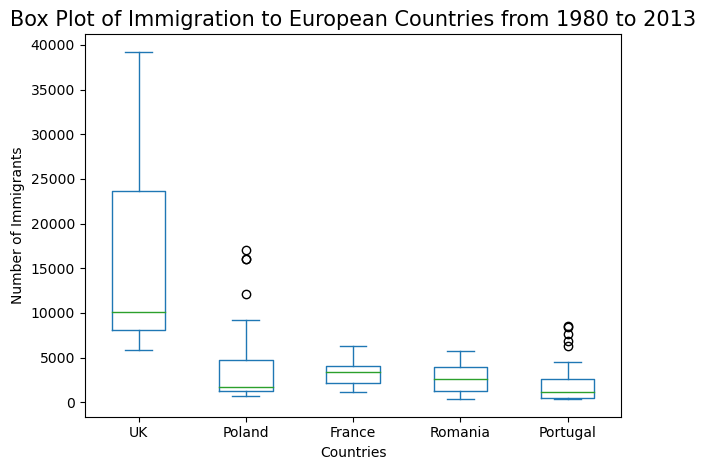

In [37]:
df_europe.rename(columns={'United Kingdom of Great Britain and Northern Ireland': 'UK'}, inplace=True)
df_europe_years = df_europe[years].transpose()
plt.figure(figsize=(100, 6))
df_europe_years.plot(kind="box")
plt.title('Box Plot of Immigration to European Countries from 1980 to 2013', fontsize=15)
plt.xlabel('Countries')
plt.ylabel('Number of Immigrants')
plt.tight_layout()
plt.savefig('/Users/mortezaabyadeh/Desktop/boxplot_immigration_europe.pdf')

In [ ]:
df4 = df3.drop(columns=["Type", "Coverage", "AREA", "Continents","REG", "RegName", "DevName", "DEV"])
df4.set_index('Total', inplace=True)
df4.head()

In [39]:
column_sums = df4.sum()
df_sum_row = pd.DataFrame(column_sums).transpose()
df_sum_row.index = ['Sum']
df4 = df4.append(df_sum_row, ignore_index=False)
df4.tail()

/var/folders/px/yhcbpgrs1hv_2v25cgzl51w00000gn/T/ipykernel_1646/684781641.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df4 = df4.append(df_sum_row, ignore_index=False)


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Sum,99137,110563,104271,75550,73417,69978,86048,134771,139306,164432,...,232083,257457,247057,232405,243047,248768,276956,246194,256222,257537


In [40]:
df_total = df4.loc[["Sum"], years].transpose()
df_total.columns = ["Total"]
df_total["Year"]=df_total.index
df_total.reset_index(drop=True, inplace=True)

In [41]:
df_total.head()

,Total,Year
0,99137,1980
1,110563,1981
2,104271,1982
3,75550,1983
4,73417,1984


In [ ]:
plt.figure(figsize=(100, 6))
df_total.plot(kind="scatter",
             x='Year',
             y='Total')
plt.xticks(df_total['Year'][::5])
plt.title("Total Immigrant Population to Canada from 1980-1013")
plt.xlabel("Year")
plt.ylabel("Number of Immigrants")
plt.show()

In [43]:
!pip install pywaffle


In [ ]:
import matplotlib.pyplot as plt
from pywaffle import Waffle

data = {
    'Category A': 30,
    'Category B': 20,
    'Category C': 50
}

fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=data,
    colors=["#232066", "#983D3D", "#DCB732"],
    title={'label': 'My Waffle Chart', 'loc': 'center'},
    labels=["{0} ({1})".format(k, v) for k, v in data.items()],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    figsize=(10, 5)
)

plt.show()

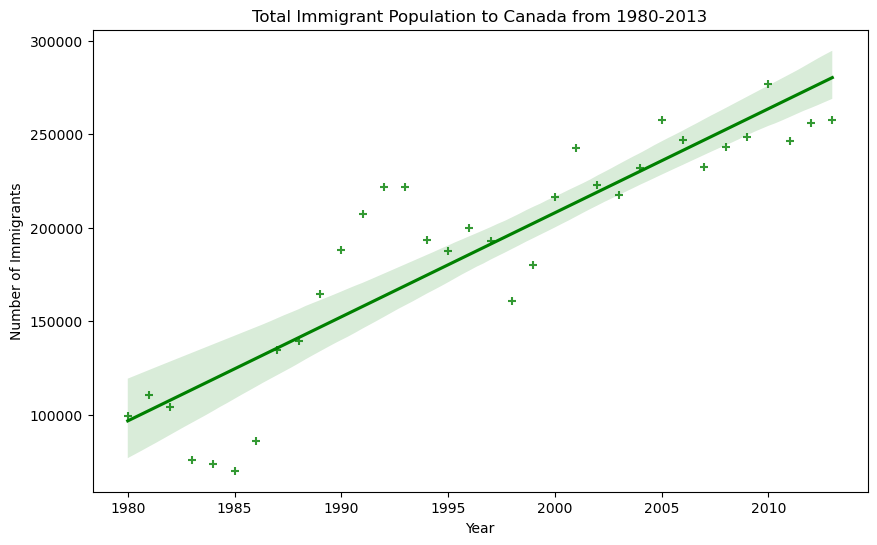

In [46]:
import seaborn as sns
df_total['Year'] = pd.to_numeric(df_total['Year'])

plt.figure(figsize=(10, 6))
ax = sns.regplot(x="Year", y="Total", data=df_total, color="green", marker="+")
plt.title("Total Immigrant Population to Canada from 1980-2013")
plt.xlabel("Year")
plt.ylabel("Number of Immigrants")
plt.show()

In [ ]:
plt.figure(figsize=(15, 6))  

sns.countplot(x="Continents", data=df3)

plt.show()

In [ ]:
plt.figure(figsize=(15, 6))  

sns.barplot(x="Continents",y="Total", data=df3)

plt.show()

In [49]:
!pip install folium

In [ ]:
import folium
world_map = folium.Map()
world_map

In [ ]:
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4, tiles='OpenStreetMap', attr='Map data © OpenStreetMap contributors')
world_map

In [ ]:
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4, tiles='OpenStreetMap', attr='Map data © OpenStreetMap contributors')
folium.Marker(location=[56.130, -106.35], popup="Ontario").add_to(world_map)
world_map

In [53]:
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4, tiles='OpenStreetMap', attr='Map data © OpenStreetMap contributors')
ontario = folium.map.FeatureGroup()
ontario.add_child(folium.features.CircleMarker([51.25, -85.32], radius=5, color="red", fill_color="Gold"))
world_map.add_child(ontario)
folium.Marker(location=[51.25, -85.32], popup="Ontario").add_to(world_map)
world_map

In [54]:
import plotly.graph_objects as go
import plotly.express as px
import numpy as np

In [55]:
np.random.seed(10)
x = np.arange(12)
y = np.random.randint(50, 500, size=12)

In [ ]:
fig = go.Figure(data=go.Scatter(x=x, y=y))
fig.update_layout(title="Simple line plot", xaxis_title="Month", yaxis_title="Sales")
fig.show()

In [57]:
pip install piplite

ERROR: Could not find a version that satisfies the requirement piplite (from versions: none)
ERROR: No matching distribution found for piplite
Note: you may need to restart the kernel to use updated packages.


In [ ]:
age_array=np.random.randint(25,55,60)
# Define an array containing salesamount values 
income_array=np.random.randint(300000,700000,3000000)
fig=go.Figure()
fig

In [ ]:
fig.add_trace(go.Scatter(x=age_array, y=income_array, mode='markers', marker=dict(color='blue')))

In [ ]:
fig.update_layout(title='Economic Survey', xaxis_title='Age', yaxis_title='Income')
# Display the figure
fig.show()

In [ ]:
numberofbicyclessold_array=[50,100,40,150,160,70,60,45]
# Define an array containing months
months_array=["Jan","Feb","Mar","April","May","June","July","August"]
fig=go.Figure()
fig.add_trace(go.Scatter(x=months_array, y=numberofbicyclessold_array, mode='lines', marker=dict(color='green')))
fig.update_layout(title='Bicycle Sales', xaxis_title='Months', yaxis_title='Number of Bicycles Sold')
# Display the figure
fig.show()

In [ ]:
crime_details = {
    'City' : ['Chicago', 'Chicago', 'Austin', 'Austin','Seattle','Seattle'],
    'Numberofcrimes' : [1000, 1200, 400, 700,350,1500],
    'Year' : ['2007', '2008', '2007', '2008','2007','2008'],
}
  
# create a Dataframe object with the dictionary
df = pd.DataFrame(crime_details)
  
df

bub_data = df.groupby('City')['Numberofcrimes'].sum().reset_index()
fig = px.scatter(bub_data, x="City", y="Numberofcrimes", size="Numberofcrimes",
                 hover_name="City", title='Crime Statistics', size_max=60)
fig.show()

In [ ]:
data = dict(
    character=["Eve", "Cain", "Seth", "Enos", "Noam", "Abel", "Awan", "Enoch", "Azura"],
    parent=["", "Eve", "Eve", "Seth", "Seth", "Eve", "Eve", "Awan", "Eve" ],
    value=[10, 14, 12, 10, 2, 6, 6, 4, 4])

fig = px.sunburst(
    data,
    names='character',
    parents='parent',
    values='value',
    title="Family chart"
)
fig.show()

In [65]:
!pip install requests
!pip install folium

In [66]:
import requests

In [67]:
import requests
import pandas as pd
from io import StringIO

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/airline_data.csv'

# Fetch the CSV data from the URL
response = requests.get(URL)

# Check if the request was successful
if response.status_code == 200:
    # Use StringIO to read the CSV data into a pandas DataFrame
    csv_data = StringIO(response.text)
    airline_data = pd.read_csv(csv_data)

    # Display the DataFrame
    print(df.head())
else:
    print(f"Failed to fetch data. Status code: {response.status_code}")

      City  Numberofcrimes  Year
0  Chicago            1000  2007
1  Chicago            1200  2008
2   Austin             400  2007
3   Austin             700  2008
4  Seattle             350  2007


In [ ]:
airline_data.head()

In [69]:
data = airline_data.sample(n=500, random_state=42)
data.shape

(500, 110)

In [70]:
data["DepTime"].head()

5312      742.0
18357    1900.0
6428     2120.0
15414    1625.0
10610    1355.0
Name: DepTime, dtype: float64

In [ ]:
fig=go.Figure()
fig
fig.add_trace(go.Scatter(x=data['Distance'], y=data['DepTime'], mode='markers', marker=dict(color='blue')))

In [ ]:
fig.update_layout(title='Distance vs Departure Time', title_x=0.5, xaxis_title='Distance', yaxis_title='DepTime', xaxis=dict(range=[0, max(data['Distance'])]), yaxis=dict(range=[0, max(data['DepTime'])]))
fig.show()

In [73]:
bub_data = data.groupby('Reporting_Airline')['Flights'].sum().reset_index()
fig = px.scatter(bub_data, x="Reporting_Airline", y="Flights", size="Flights",
                 hover_name="Reporting_Airline", title='Reporting Airline vs Number of Flights', size_max=60)
fig.show()

In [ ]:
fig = px.sunburst(
    data,
    path=['Month', 'DestStateName'], 
    values='Flights', 
    title='Flight Distribution Hierarchy' 
)

fig.show()

In [75]:
fig = px.sunburst(
    data,
    path=['Month', 'DestStateName'], 
    values='Flights', 
    title='Flight Distribution Hierarchy' 
)

fig.update_layout(
    width=1000,  
    height=800,  
    title={'x':0.5},  
    title_font_size=24  
)
fig.show()

In [ ]:
pip install pandas dash

## Use following code in your terminal
python3.9 -m pip install packaging
python3.9 -m pip install pandas dash
pip3 install httpx==0.20 dash plotly

In [78]:
#in case if you need,  use this code in your terminal first: 
# python3.9 -m pip install --upgrade Jinja2    
# python3.9 -m pip install --upgrade Flask Dash


import pandas as pd
import plotly.express as px
import dash
from dash import dcc
from dash import html

In [79]:
airline_data =  pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/airline_data.csv', 
                            encoding = "ISO-8859-1",
                            dtype={'Div1Airport': str, 'Div1TailNum': str, 
                                   'Div2Airport': str, 'Div2TailNum': str})

In [ ]:
airline_data.head()

In [81]:
data = airline_data.sample(n=500, random_state=42)

In [82]:
fig = px.pie(data, values='Flights', names='DistanceGroup', title='Distance group proportion by flights')

In [ ]:
app = dash.Dash(__name__)


app.layout = html.Div(children=[html.H1("Airline Dashboard",
                                        style={'textAlign': 'center', 
                                               'color': '#503D36',
                                               'font-size': 40}),
                                html.P('Proportion of distance group (250 mile distance interval group) by flights.',
                                       style={'textAlign':'center', 'color': '#F57241'}),
                                dcc.Graph(figure=fig),
                                               
                    ])


if __name__ == '__main__':
    app.run_server()